# EDA COFFEE SHOP SALES
[source](https://github.com/Realbenjizo/Structure_a_data_analysis_project/blob/main/Structure_A_Data_Analysis_Project.ipynb)

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [21]:
df_coffee = pd.read_csv('../../data/coffee_shop_sales.csv')

In [22]:
print("Data Structure:")
print(df_coffee.info())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15 non-null     object 
 1   product        15 non-null     object 
 2   units_sold     15 non-null     int64  
 3   price          15 non-null     float64
 4   total_revenue  15 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 732.0+ bytes
None


In [23]:
df_coffee.dtypes

date              object
product           object
units_sold         int64
price            float64
total_revenue    float64
dtype: object

In [24]:
print(f"First 5 rows of the dataset:\n{df_coffee.head()}")

First 5 rows of the dataset:
        date     product  units_sold  price  total_revenue
0  1 01 2023    Espresso          50   4.00          200.0
1  1 01 2023       Latte          30   4.50          135.0
2  2 01 2023    Espresso          45   4.00          180.0
3  2 01 2023       Latte          35   4.50          157.5
4  3 01 2023  Cappuccino          40   4.25          170.0


## Data Munging

In [27]:
# Convert 'date' column to datetime
df_coffee['date'] = pd.to_datetime(df_coffee['date'], dayfirst=True)

df_coffee.dtypes

date             datetime64[ns]
product                  object
units_sold                int64
price                   float64
total_revenue           float64
dtype: object

In [29]:
# Double check the calculation
df_coffee['calculated_revenue'] = df_coffee['units_sold'] * df_coffee['price']
check_revenue = (df_coffee['total_revenue'] == df_coffee['calculated_revenue']).all()

print(f"Revenue calculation check: {check_revenue}")

Revenue calculation check: True


In [17]:
# Drop the 'calculated_revenue' column
try:
    df_coffee = df_coffee.drop(columns=['calculated_revenue'], inplace=True)
except KeyError:
    print("Column 'calculated_revenue' does not exist in the DataFrame.")

## Analyzing Revenue Patterns

In [30]:
print(df_coffee.head())

        date     product  units_sold  price  total_revenue  calculated_revenue
0 2023-01-01    Espresso          50   4.00          200.0               200.0
1 2023-01-01       Latte          30   4.50          135.0               135.0
2 2023-01-02    Espresso          45   4.00          180.0               180.0
3 2023-01-02       Latte          35   4.50          157.5               157.5
4 2023-01-03  Cappuccino          40   4.25          170.0               170.0


In [ ]:
# Summarize revenue by product
product_revenue = df_coffee.groupby('product', as_index=False)['total_revenue'].sum()
product_revenue = product_revenue.sort_values(by='total_revenue', ascending=False)

print("Revenue by Product:")
print(product_revenue)

Revenue by Product:
      product  total_revenue
1    Espresso         940.00
2       Latte         792.00
0  Cappuccino         607.75


In [ ]:
# Summarize revenue by day of the week
df_coffee['day_of_week'] = df_coffee.date.dt.dayofweek

day_trends = df_coffee.groupby('day_of_week', as_index=False)['total_revenue'].mean()
day_trends = day_trends.rename(columns = {'total_revenue': 'avg_daily_revenue'})

print("Average Daily Revenue by Day of the Week:")
print(day_trends)

Average Daily Revenue by Day of the Week:
   day_of_week  avg_daily_revenue
0            0         142.812500
1            1         179.000000
2            2         157.000000
3            3         154.000000
4            4          85.000000
5            5         220.000000
6            6         161.166667


## Visualizing Revenue Patterns

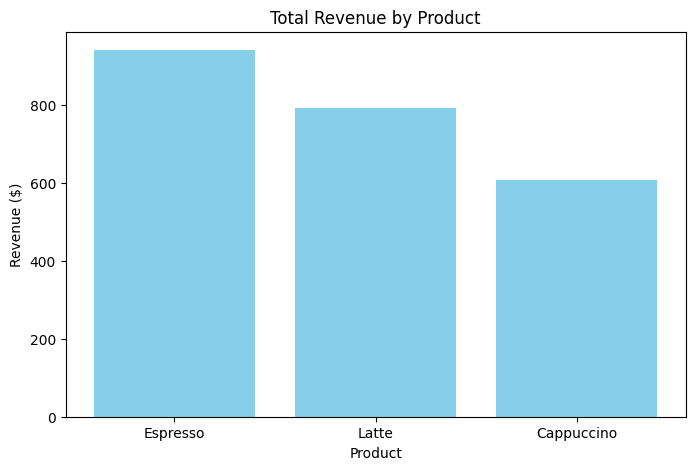

In [ ]:
# Total revenue by product
plt.figure(figsize=(8, 5))

plt.bar(product_revenue['product'],
        product_revenue['total_revenue'],
        color='skyblue')

plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.show()

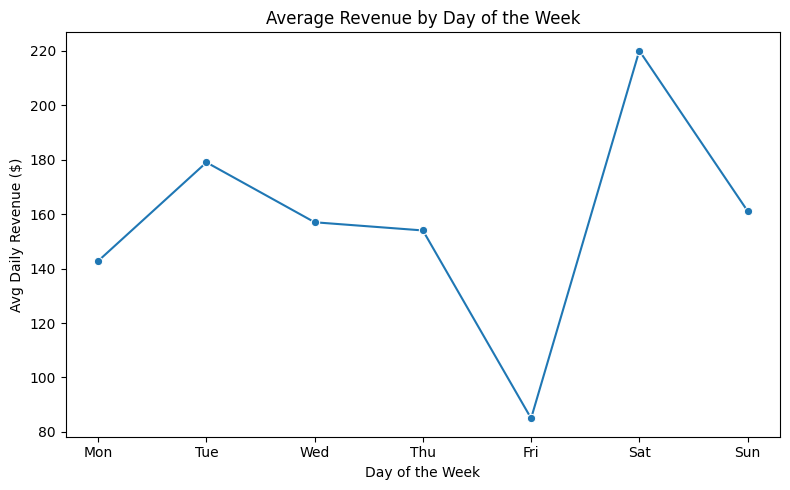

In [ ]:
# Average daily revenue by day of the week

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_trends['day_name'] = day_trends['day_of_week'].map(lambda x: day_names[x])

plt.figure(figsize=(8, 5))

sns.lineplot(data=day_trends, x='day_name', y='avg_daily_revenue', marker='o')

plt.title('Average Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Avg Daily Revenue ($)')
plt.tight_layout()
plt.show()
